# **Package**

In [ ]:
pip install kagglehub

Note: you may need to restart the kernel to use updated packages.


# Required Libraries

In [8]:
# Data manipulation and analysis
import pandas as pd
import numpy as np
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8')

# Machine learning libraries
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from sklearn.feature_selection import SelectKBest, f_regression, chi2

# Statistical analysis
from scipy import stats
from scipy.stats import zscore

# Distance calculation
from math import radians, cos, sin, asin, sqrt

# Model persistence
import pickle

# Streamlit (for deployment)
import streamlit as st

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


# 1️⃣ Data Collection

In [9]:
import kagglehub
import warnings
warnings.filterwarnings("ignore")

# Download latest version
path = kagglehub.dataset_download("ivasanthp/tripfare-predicting-urban-taxi-fare")
print("Path to dataset files:", path)

Path to dataset files: C:\Users\ivasa\.cache\kagglehub\datasets\ivasanthp\tripfare-predicting-urban-taxi-fare\versions\1


In [10]:
import os
os.listdir(path)

['taxi_fare.csv']

In [11]:
import pandas as pd
data = pd.read_csv(os.path.join(path, 'taxi_fare.csv'))
data

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-03-01 00:00:00,2016-03-01 00:07:55,1,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35
1,1,2016-03-01 00:00:00,2016-03-01 00:11:06,1,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35
2,2,2016-03-01 00:00:00,2016-03-01 00:31:06,2,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80
3,2,2016-03-01 00:00:00,2016-03-01 00:00:00,3,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62
4,2,2016-03-01 00:00:00,2016-03-01 00:00:00,5,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212340,2,2016-03-01 12:15:37,2016-03-01 12:38:53,1,-73.955688,40.782261,1,N,-73.974915,40.751282,1,16.0,0.0,0.5,3.36,0.00,0.3,20.16
212341,2,2016-03-01 12:15:37,2016-03-01 12:38:22,1,-74.002197,40.715042,1,N,-73.976295,40.739609,1,15.5,0.0,0.5,2.00,0.00,0.3,18.30
212342,2,2016-03-01 12:15:37,2016-03-01 12:18:18,1,-73.991173,40.733170,1,N,-73.994324,40.728531,1,4.0,0.0,0.5,0.00,0.00,0.3,4.80
212343,1,2016-03-01 12:15:38,2016-03-01 12:22:47,2,-73.972099,40.786446,1,N,-73.955872,40.779755,2,7.0,0.0,0.5,0.00,0.00,0.3,7.80


# 2️⃣ Data Understanding

#### Basic statistics

In [12]:
print("📊 BASIC STATISTICS:")
print(data.describe().T)

📊 BASIC STATISTICS:
                          count       mean        std         min        25%  \
VendorID               212345.0   1.708338   0.454529    1.000000   1.000000   
passenger_count        212345.0   1.766493   1.469647    0.000000   1.000000   
pickup_longitude       212345.0 -73.112122   7.936633 -121.933327 -73.990891   
pickup_latitude        212345.0  40.279405   4.370714    0.000000  40.740292   
RatecodeID             212345.0   1.034152   0.494699    1.000000   1.000000   
dropoff_longitude      212345.0 -73.144178   7.794599 -121.933327 -73.990570   
dropoff_latitude       212345.0  40.295648   4.293031    0.000000  40.740089   
payment_type           212345.0   1.324943   0.478255    1.000000   1.000000   
fare_amount            212345.0  12.665588  10.875584  -52.000000   6.500000   
extra                  212345.0   0.048077   0.148103   -0.500000   0.000000   
mta_tax                212345.0   0.497662   0.037436   -0.500000   0.500000   
tip_amount          

In [13]:
# Displaying first few rows for a quick look
data_head = data.head()
data_head

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-03-01 00:00:00,2016-03-01 00:07:55,1,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35
1,1,2016-03-01 00:00:00,2016-03-01 00:11:06,1,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35
2,2,2016-03-01 00:00:00,2016-03-01 00:31:06,2,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80
3,2,2016-03-01 00:00:00,2016-03-01 00:00:00,3,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62
4,2,2016-03-01 00:00:00,2016-03-01 00:00:00,5,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80


In [14]:
data_info = data.info()
data_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212345 entries, 0 to 212344
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               212345 non-null  int64  
 1   tpep_pickup_datetime   212345 non-null  object 
 2   tpep_dropoff_datetime  212345 non-null  object 
 3   passenger_count        212345 non-null  int64  
 4   pickup_longitude       212345 non-null  float64
 5   pickup_latitude        212345 non-null  float64
 6   RatecodeID             212345 non-null  int64  
 7   store_and_fwd_flag     212345 non-null  object 
 8   dropoff_longitude      212345 non-null  float64
 9   dropoff_latitude       212345 non-null  float64
 10  payment_type           212345 non-null  int64  
 11  fare_amount            212345 non-null  float64
 12  extra                  212345 non-null  float64
 13  mta_tax                212345 non-null  float64
 14  tip_amount             212345 non-nu

# 3️⃣ Feature Engineering:

In [15]:
# Convert UTC to EDT and extract time features
print("⏰ Converting pickup_datetime from UTC to EDT...")
data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'], utc=True)
data['tpep_pickup_datetime'] = data['tpep_pickup_datetime'].dt.tz_convert('America/New_York')
data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'], utc=True)
data['tpep_dropoff_datetime'] = data['tpep_dropoff_datetime'].dt.tz_convert('America/New_York')

⏰ Converting pickup_datetime from UTC to EDT...


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212345 entries, 0 to 212344
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype                           
---  ------                 --------------   -----                           
 0   VendorID               212345 non-null  int64                           
 1   tpep_pickup_datetime   212345 non-null  datetime64[ns, America/New_York]
 2   tpep_dropoff_datetime  212345 non-null  datetime64[ns, America/New_York]
 3   passenger_count        212345 non-null  int64                           
 4   pickup_longitude       212345 non-null  float64                         
 5   pickup_latitude        212345 non-null  float64                         
 6   RatecodeID             212345 non-null  int64                           
 7   store_and_fwd_flag     212345 non-null  object                          
 8   dropoff_longitude      212345 non-null  float64                         
 9   dropoff_latitude       212

In [17]:
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-02-29 19:00:00-05:00,2016-02-29 19:07:55-05:00,1,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35
1,1,2016-02-29 19:00:00-05:00,2016-02-29 19:11:06-05:00,1,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35
2,2,2016-02-29 19:00:00-05:00,2016-02-29 19:31:06-05:00,2,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80
3,2,2016-02-29 19:00:00-05:00,2016-02-29 19:00:00-05:00,3,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62
4,2,2016-02-29 19:00:00-05:00,2016-02-29 19:00:00-05:00,5,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80


## Feature Engineering
* trip_distance_calculated: Use Haversine formula (from pickup & dropoff coordinates)
* trip_duration_calculated:

#### radius of the the earth
* in miles = 3,963.1 mi
* in km = 6,378 km

In [18]:
import math

In [19]:
from math import radians, sin, cos, asin, sqrt
import pandas as pd

# Haversine distance function
def haversine_distance(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points on Earth (in miles)
    using the Haversine formula
    """
    # Convert decimal degrees to radians
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon / 2) ** 2
    c = 2 * asin(sqrt(a))

    # Radius of Earth in miles
    r = 3963
    return c * r

In [20]:
# Feature engineering function
def feature_engineering(data):
    """
    Create new features from existing columns
    """
    print("🔧 Starting Feature Engineering...")
    data_clean = data.copy()

    # Calculate trip distance using Haversine formula
    print("📏 Calculating trip distances...")
    data_clean['trip_distance_calculated'] = data_clean.apply(
        lambda row: haversine_distance(
            row['pickup_longitude'], row['pickup_latitude'],
            row['dropoff_longitude'], row['dropoff_latitude']
        ), axis=1
    )

    print("✅ Feature engineering completed!")
    print(f"📊 New dataset shape: {data_clean.shape}")

    return data_clean

# Example usage:
# df_engineered will have all new features
data_engineered = feature_engineering(data)

# Now use df_engineered instead of data_clean
print(data_engineered.columns)

# If you want to replace the original dataset:
data = data_engineered.copy()


🔧 Starting Feature Engineering...
📏 Calculating trip distances...
✅ Feature engineering completed!
📊 New dataset shape: (212345, 19)
Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude', 'RatecodeID',
       'store_and_fwd_flag', 'dropoff_longitude', 'dropoff_latitude',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount',
       'trip_distance_calculated'],
      dtype='object')


In [21]:
data['trip_duration_minutes'] = (data['tpep_dropoff_datetime'] - data['tpep_pickup_datetime']).dt.total_seconds() / 60

In [22]:
# Displaying the first few rows to check the conversion and the new column
data[['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'trip_distance_calculated','trip_duration_minutes']].head()

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance_calculated,trip_duration_minutes
0,2016-02-29 19:00:00-05:00,2016-02-29 19:07:55-05:00,1.952013,7.916667
1,2016-02-29 19:00:00-05:00,2016-02-29 19:11:06-05:00,2.676833,11.100000
2,2016-02-29 19:00:00-05:00,2016-02-29 19:31:06-05:00,10.325908,31.100000
3,2016-02-29 19:00:00-05:00,2016-02-29 19:00:00-05:00,5.627290,0.000000
4,2016-02-29 19:00:00-05:00,2016-02-29 19:00:00-05:00,12.689576,0.000000


In [23]:
print(f"Columns: {list(data.columns)}")

Columns: ['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'pickup_longitude', 'pickup_latitude', 'RatecodeID', 'store_and_fwd_flag', 'dropoff_longitude', 'dropoff_latitude', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'trip_distance_calculated', 'trip_duration_minutes']


In [24]:
# Pickup time feature
data['pickup_year'] = data['tpep_pickup_datetime'].dt.year
data['pickup_month'] = data['tpep_pickup_datetime'].dt.month
data['pickup_weekday_name'] = data['tpep_pickup_datetime'].dt.day_name()
data['pickup_hour'] = data['tpep_pickup_datetime'].dt.hour

In [25]:
# Dropoff time features
data['dropoff_year'] = data['tpep_dropoff_datetime'].dt.year
data['dropoff_month'] = data['tpep_dropoff_datetime'].dt.month
data['dropoff_weekday_name'] = data['tpep_dropoff_datetime'].dt.day_name()
data['dropoff_hour'] = data['tpep_dropoff_datetime'].dt.hour

In [26]:
print(f"Columns: {list(data.columns)}")

Columns: ['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'pickup_longitude', 'pickup_latitude', 'RatecodeID', 'store_and_fwd_flag', 'dropoff_longitude', 'dropoff_latitude', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'trip_distance_calculated', 'trip_duration_minutes', 'pickup_year', 'pickup_month', 'pickup_weekday_name', 'pickup_hour', 'dropoff_year', 'dropoff_month', 'dropoff_weekday_name', 'dropoff_hour']


In [27]:
data['pickup_weekday_name'].unique()

array(['Monday', 'Thursday', 'Tuesday'], dtype=object)

In [28]:
data['dropoff_weekday_name'].unique()

array(['Monday', 'Thursday', 'Friday', 'Tuesday', 'Wednesday'],
      dtype=object)

### pickup_day: Extract weekday/weekend

In [29]:
# Weekend indicator
# data['is_weekend'] = (data['pickup_weekday'] >= 5).astype(int)
# This is will not work as the given Dataset has been available for these weekdays monday, tuesday and thursday which falls in weekdays.

### Extract am/pm

In [30]:
# AM/PM indicator
data['is_pm'] = (data['pickup_hour'] >= 12).astype(int)
data['is_pm'] = (data['dropoff_hour'] >= 12).astype(int)

### is_night: Binary flag for late-night/early-morning trips

In [31]:
# Night ride indicator (10 PM to 6 AM)
data['is_night'] = ((data['pickup_hour'] >= 22) | (data['pickup_hour'] <= 6)).astype(int)
data['is_night'] = ((data['dropoff_hour'] >= 22) | (data['dropoff_hour'] <= 6)).astype(int)

In [32]:
# Rush hour indicators
data['is_morning_rush'] = ((data['pickup_hour'] >= 7) & (data['pickup_hour'] <= 9)).astype(int)
data['is_evening_rush'] = ((data['pickup_hour'] >= 17) & (data['pickup_hour'] <= 19)).astype(int)
data['is_morning_rush'] = ((data['dropoff_hour'] >= 7) & (data['dropoff_hour'] <= 9)).astype(int)
data['is_evening_rush'] = ((data['dropoff_hour'] >= 17) & (data['dropoff_hour'] <= 19)).astype(int)

In [33]:
# Fare per mile and fare per minute
# data['fare_per_mile'] = data['fare_amount'] / (df['trip_distance_calculated'] + 1e-8)
# data['fare_per_minute'] = data['fare_amount'] / (df['trip_duration_minutes'] + 1e-8)

In [34]:
# Speed (miles per hour)
# data['speed_mph'] = (data['trip_distance_calculated'] * 60) / (data['trip_duration_minutes'] + 1e-8)

In [35]:
# Passenger density feature
# data['fare_per_passenger'] = data['fare_amount'] / (data['passenger_count'] + 1e-8)

In [36]:
print(f"Columns: {list(data.columns)}")

Columns: ['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'pickup_longitude', 'pickup_latitude', 'RatecodeID', 'store_and_fwd_flag', 'dropoff_longitude', 'dropoff_latitude', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'trip_distance_calculated', 'trip_duration_minutes', 'pickup_year', 'pickup_month', 'pickup_weekday_name', 'pickup_hour', 'dropoff_year', 'dropoff_month', 'dropoff_weekday_name', 'dropoff_hour', 'is_pm', 'is_night', 'is_morning_rush', 'is_evening_rush']


In [37]:
data.shape

(212345, 32)

In [38]:
# Data types
print("🔍 DATA TYPES:")
print(data.dtypes)
print("-" * 40)  # separator line
print(data.shape)

🔍 DATA TYPES:
VendorID                                               int64
tpep_pickup_datetime        datetime64[ns, America/New_York]
tpep_dropoff_datetime       datetime64[ns, America/New_York]
passenger_count                                        int64
pickup_longitude                                     float64
pickup_latitude                                      float64
RatecodeID                                             int64
store_and_fwd_flag                                    object
dropoff_longitude                                    float64
dropoff_latitude                                     float64
payment_type                                           int64
fare_amount                                          float64
extra                                                float64
mta_tax                                              float64
tip_amount                                           float64
tolls_amount                                         float64
improvemen

In [39]:
print(data.isnull().sum())
print("-" * 40)  # separator line
print(data.isna().sum())

VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count             0
pickup_longitude            0
pickup_latitude             0
RatecodeID                  0
store_and_fwd_flag          0
dropoff_longitude           0
dropoff_latitude            0
payment_type                0
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
trip_distance_calculated    0
trip_duration_minutes       0
pickup_year                 0
pickup_month                0
pickup_weekday_name         0
pickup_hour                 0
dropoff_year                0
dropoff_month               0
dropoff_weekday_name        0
dropoff_hour                0
is_pm                       0
is_night                    0
is_morning_rush             0
is_evening_rush             0
dtype: int64
---------------------------

In [40]:
data.duplicated().sum()

np.int64(0)

In [41]:
data['store_and_fwd_flag'].value_counts()

store_and_fwd_flag
N    211684
Y       661
Name: count, dtype: int64

In [42]:
data.shape

(212345, 32)

In [43]:
# Drop Latitude and Longitude Column once Trip_distance_calculated is created using Haversine Formula.
# Total Fare amount is calculated using 'fare_amount', 'extra', 'mta_tax', 'tip_amount','tolls_amount', 'improvement_surcharge' 
data.drop(['tpep_pickup_datetime', 'tpep_dropoff_datetime','store_and_fwd_flag','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','fare_amount', 'extra', 'mta_tax', 'tip_amount','tolls_amount', 'improvement_surcharge'], axis=1, inplace=True)

In [44]:
print(f"Columns: {list(data.columns)}")
print("-" * 40)  # separator line
print(f"Shape:{(data.shape)}")

Columns: ['VendorID', 'passenger_count', 'RatecodeID', 'payment_type', 'total_amount', 'trip_distance_calculated', 'trip_duration_minutes', 'pickup_year', 'pickup_month', 'pickup_weekday_name', 'pickup_hour', 'dropoff_year', 'dropoff_month', 'dropoff_weekday_name', 'dropoff_hour', 'is_pm', 'is_night', 'is_morning_rush', 'is_evening_rush']
----------------------------------------
Shape:(212345, 19)


In [45]:
pd.set_option("display.max_columns",None)

In [46]:
data[(data["trip_distance_calculated"] == 0)]

,VendorID,passenger_count,RatecodeID,payment_type,total_amount,trip_distance_calculated,trip_duration_minutes,pickup_year,pickup_month,pickup_weekday_name,pickup_hour,dropoff_year,dropoff_month,dropoff_weekday_name,dropoff_hour,is_pm,is_night,is_morning_rush,is_evening_rush
95,2,1,1,1,8.80,0.0,8.583333,2016,2,Monday,19,2016,2,Monday,19,1,0,0,1
116,2,1,1,1,16.62,0.0,10.966667,2016,2,Monday,19,2016,2,Monday,19,1,0,0,1
129,2,3,5,2,59.14,0.0,39.050000,2016,2,Monday,19,2016,2,Monday,19,1,0,0,1
365,2,2,1,1,44.64,0.0,24.433333,2016,3,Thursday,2,2016,3,Thursday,2,0,1,0,0
478,2,1,3,1,98.16,0.0,30.850000,2016,3,Thursday,2,2016,3,Thursday,2,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212064,1,1,1,3,15.80,0.0,20.500000,2016,3,Tuesday,7,2016,3,Tuesday,7,0,0,1,0
212086,1,1,1,2,6.30,0.0,6.116667,2016,3,Tuesday,7,2016,3,Tuesday,7,0,0,1,0
212209,1,1,1,2,11.30,0.0,13.100000,2016,3,Tuesday,7,2016,3,Tuesday,7,0,0,1,0
212228,1,1,1,1,8.15,0.0,4.883333,2016,3,Tuesday,7,2016,3,Tuesday,7,0,0,1,0


In [47]:
data[(data["total_amount"] == 0)]

,VendorID,passenger_count,RatecodeID,payment_type,total_amount,trip_distance_calculated,trip_duration_minutes,pickup_year,pickup_month,pickup_weekday_name,pickup_hour,dropoff_year,dropoff_month,dropoff_weekday_name,dropoff_hour,is_pm,is_night,is_morning_rush,is_evening_rush
354,2,5,1,2,0.0,0.004038,0.050000,2016,3,Thursday,2,2016,3,Thursday,2,0,1,0,0
1309,2,1,1,2,0.0,0.000662,2.050000,2016,3,Thursday,2,2016,3,Thursday,2,0,1,0,0
2560,2,1,1,2,0.0,0.000958,1.400000,2016,3,Thursday,2,2016,3,Thursday,2,0,1,0,0
4036,2,1,1,2,0.0,0.009822,3.100000,2016,3,Thursday,2,2016,3,Thursday,2,0,1,0,0
5196,2,6,1,2,0.0,5386.540394,0.133333,2016,3,Thursday,2,2016,3,Thursday,2,0,1,0,0
5462,2,1,1,2,0.0,0.002395,3.083333,2016,3,Thursday,2,2016,3,Thursday,2,0,1,0,0
6465,2,1,1,2,0.0,0.000000,1.966667,2016,3,Thursday,2,2016,3,Thursday,2,0,1,0,0
7555,2,1,1,2,0.0,0.012713,1.283333,2016,3,Thursday,2,2016,3,Thursday,2,0,1,0,0
8415,2,1,1,2,0.0,0.010321,1.700000,2016,3,Thursday,2,2016,3,Thursday,2,0,1,0,0
10010,2,5,1,2,0.0,0.000799,1.483333,2016,3,Thursday,3,2016,3,Thursday,3,0,1,0,0


In [48]:
data[(data["passenger_count"] == 0)]

,VendorID,passenger_count,RatecodeID,payment_type,total_amount,trip_distance_calculated,trip_duration_minutes,pickup_year,pickup_month,pickup_weekday_name,pickup_hour,dropoff_year,dropoff_month,dropoff_weekday_name,dropoff_hour,is_pm,is_night,is_morning_rush,is_evening_rush
13787,2,0,2,2,57.30,0.000000,403.266667,2016,3,Thursday,3,2016,3,Thursday,10,0,0,0,0
83120,2,0,5,2,35.30,0.272515,19.000000,2016,2,Monday,21,2016,2,Monday,21,1,0,0,0
84183,2,0,5,1,21.30,0.002151,0.300000,2016,2,Monday,21,2016,2,Monday,21,1,0,0,0
121599,1,0,99,1,6.80,5390.470749,240.000000,2016,3,Tuesday,2,2016,3,Tuesday,6,0,1,0,0
147430,1,0,5,1,122.30,0.002648,1.100000,2016,3,Tuesday,3,2016,3,Tuesday,3,0,1,0,0
156148,1,0,5,2,0.30,1.342318,13.150000,2016,3,Tuesday,4,2016,3,Tuesday,4,0,1,0,0
177486,1,0,99,1,15.80,5390.167084,240.000000,2016,3,Tuesday,5,2016,3,Tuesday,9,0,0,1,0
180349,1,0,5,1,60.95,3.814924,26.883333,2016,3,Tuesday,5,2016,3,Tuesday,5,0,1,0,0
184075,1,0,99,1,0.00,5389.704214,120.000000,2016,3,Tuesday,5,2016,3,Tuesday,7,0,0,1,0


In [49]:
data[(data["total_amount"] == 0) & (data["trip_distance_calculated"] == 0) & (data["passenger_count"] == 0)]

,VendorID,passenger_count,RatecodeID,payment_type,total_amount,trip_distance_calculated,trip_duration_minutes,pickup_year,pickup_month,pickup_weekday_name,pickup_hour,dropoff_year,dropoff_month,dropoff_weekday_name,dropoff_hour,is_pm,is_night,is_morning_rush,is_evening_rush


In [50]:
data[(data["total_amount"] == 0) & (data["trip_distance_calculated"] > 0)]

,VendorID,passenger_count,RatecodeID,payment_type,total_amount,trip_distance_calculated,trip_duration_minutes,pickup_year,pickup_month,pickup_weekday_name,pickup_hour,dropoff_year,dropoff_month,dropoff_weekday_name,dropoff_hour,is_pm,is_night,is_morning_rush,is_evening_rush
354,2,5,1,2,0.0,0.004038,0.050000,2016,3,Thursday,2,2016,3,Thursday,2,0,1,0,0
1309,2,1,1,2,0.0,0.000662,2.050000,2016,3,Thursday,2,2016,3,Thursday,2,0,1,0,0
2560,2,1,1,2,0.0,0.000958,1.400000,2016,3,Thursday,2,2016,3,Thursday,2,0,1,0,0
4036,2,1,1,2,0.0,0.009822,3.100000,2016,3,Thursday,2,2016,3,Thursday,2,0,1,0,0
5196,2,6,1,2,0.0,5386.540394,0.133333,2016,3,Thursday,2,2016,3,Thursday,2,0,1,0,0
5462,2,1,1,2,0.0,0.002395,3.083333,2016,3,Thursday,2,2016,3,Thursday,2,0,1,0,0
7555,2,1,1,2,0.0,0.012713,1.283333,2016,3,Thursday,2,2016,3,Thursday,2,0,1,0,0
8415,2,1,1,2,0.0,0.010321,1.700000,2016,3,Thursday,2,2016,3,Thursday,2,0,1,0,0
10010,2,5,1,2,0.0,0.000799,1.483333,2016,3,Thursday,3,2016,3,Thursday,3,0,1,0,0
13974,2,1,1,2,0.0,0.001597,1.316667,2016,3,Thursday,3,2016,3,Thursday,3,0,1,0,0


In [51]:
data[(data["trip_distance_calculated"] == 0) & (data["total_amount"] > 0)]

,VendorID,passenger_count,RatecodeID,payment_type,total_amount,trip_distance_calculated,trip_duration_minutes,pickup_year,pickup_month,pickup_weekday_name,pickup_hour,dropoff_year,dropoff_month,dropoff_weekday_name,dropoff_hour,is_pm,is_night,is_morning_rush,is_evening_rush
95,2,1,1,1,8.80,0.0,8.583333,2016,2,Monday,19,2016,2,Monday,19,1,0,0,1
116,2,1,1,1,16.62,0.0,10.966667,2016,2,Monday,19,2016,2,Monday,19,1,0,0,1
129,2,3,5,2,59.14,0.0,39.050000,2016,2,Monday,19,2016,2,Monday,19,1,0,0,1
365,2,2,1,1,44.64,0.0,24.433333,2016,3,Thursday,2,2016,3,Thursday,2,0,1,0,0
478,2,1,3,1,98.16,0.0,30.850000,2016,3,Thursday,2,2016,3,Thursday,2,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212064,1,1,1,3,15.80,0.0,20.500000,2016,3,Tuesday,7,2016,3,Tuesday,7,0,0,1,0
212086,1,1,1,2,6.30,0.0,6.116667,2016,3,Tuesday,7,2016,3,Tuesday,7,0,0,1,0
212209,1,1,1,2,11.30,0.0,13.100000,2016,3,Tuesday,7,2016,3,Tuesday,7,0,0,1,0
212228,1,1,1,1,8.15,0.0,4.883333,2016,3,Tuesday,7,2016,3,Tuesday,7,0,0,1,0


In [52]:
data[(data["passenger_count"] == 0) & (data["total_amount"] > 0)]

,VendorID,passenger_count,RatecodeID,payment_type,total_amount,trip_distance_calculated,trip_duration_minutes,pickup_year,pickup_month,pickup_weekday_name,pickup_hour,dropoff_year,dropoff_month,dropoff_weekday_name,dropoff_hour,is_pm,is_night,is_morning_rush,is_evening_rush
13787,2,0,2,2,57.30,0.000000,403.266667,2016,3,Thursday,3,2016,3,Thursday,10,0,0,0,0
83120,2,0,5,2,35.30,0.272515,19.000000,2016,2,Monday,21,2016,2,Monday,21,1,0,0,0
84183,2,0,5,1,21.30,0.002151,0.300000,2016,2,Monday,21,2016,2,Monday,21,1,0,0,0
121599,1,0,99,1,6.80,5390.470749,240.000000,2016,3,Tuesday,2,2016,3,Tuesday,6,0,1,0,0
147430,1,0,5,1,122.30,0.002648,1.100000,2016,3,Tuesday,3,2016,3,Tuesday,3,0,1,0,0
156148,1,0,5,2,0.30,1.342318,13.150000,2016,3,Tuesday,4,2016,3,Tuesday,4,0,1,0,0
177486,1,0,99,1,15.80,5390.167084,240.000000,2016,3,Tuesday,5,2016,3,Tuesday,9,0,0,1,0
180349,1,0,5,1,60.95,3.814924,26.883333,2016,3,Tuesday,5,2016,3,Tuesday,5,0,1,0,0


In [53]:
data[(data["passenger_count"] == 0) & (data["total_amount"] == 0)]

,VendorID,passenger_count,RatecodeID,payment_type,total_amount,trip_distance_calculated,trip_duration_minutes,pickup_year,pickup_month,pickup_weekday_name,pickup_hour,dropoff_year,dropoff_month,dropoff_weekday_name,dropoff_hour,is_pm,is_night,is_morning_rush,is_evening_rush
184075,1,0,99,1,0.0,5389.704214,120.0,2016,3,Tuesday,5,2016,3,Tuesday,7,0,0,1,0


In [54]:
data['payment_type'].value_counts()

payment_type
1    144155
2     67565
3       440
4       185
Name: count, dtype: int64

In [55]:
data = data[data.trip_distance_calculated>0]

In [56]:
data = data[data.total_amount>0]

In [57]:
data = data[data.passenger_count>0]

In [61]:
data[(data["passenger_count"] <= 0)]

,VendorID,passenger_count,RatecodeID,payment_type,total_amount,trip_distance_calculated,trip_duration_minutes,pickup_year,pickup_month,pickup_weekday_name,pickup_hour,dropoff_year,dropoff_month,dropoff_weekday_name,dropoff_hour,is_pm,is_night,is_morning_rush,is_evening_rush


In [62]:
data[(data["total_amount"] <= 0)]

,VendorID,passenger_count,RatecodeID,payment_type,total_amount,trip_distance_calculated,trip_duration_minutes,pickup_year,pickup_month,pickup_weekday_name,pickup_hour,dropoff_year,dropoff_month,dropoff_weekday_name,dropoff_hour,is_pm,is_night,is_morning_rush,is_evening_rush


In [63]:
data[(data["trip_distance_calculated"] <= 0)]

,VendorID,passenger_count,RatecodeID,payment_type,total_amount,trip_distance_calculated,trip_duration_minutes,pickup_year,pickup_month,pickup_weekday_name,pickup_hour,dropoff_year,dropoff_month,dropoff_weekday_name,dropoff_hour,is_pm,is_night,is_morning_rush,is_evening_rush


In [64]:
data['VendorID'].unique() # even days - 2 and Odd Days - 1

array([1, 2])

### Feature Understanding

In [65]:
data[['passenger_count', 'total_amount', 'trip_distance_calculated', 'trip_duration_minutes', 'payment_type', 'RatecodeID']].describe()

,passenger_count,total_amount,trip_distance_calculated,trip_duration_minutes,payment_type,RatecodeID
count,209223.000000,209223.000000,209223.000000,209223.000000,209223.000000,209223.000000
mean,1.768505,15.645098,15.469476,16.197207,1.323009,1.030317
std,1.471073,13.442482,268.872522,56.312307,0.475181,0.317754
min,1.000000,0.300000,0.000264,-7174.583333,1.000000,1.000000
25%,1.000000,8.300000,0.736330,6.750000,1.000000,1.000000
50%,1.000000,11.750000,1.223732,11.300000,1.000000,1.000000
75%,2.000000,17.250000,2.244687,18.333333,2.000000,1.000000
max,6.000000,832.800000,5420.099562,1439.383333,4.000000,99.000000


# 4️⃣ Exploratory Data Analysis (EDA)

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for plots
sns.set_style("whitegrid")
# Set up the plotting parameters
plt.rcParams['figure.figsize'] = (12, 8)

### 1. Target variable distribution

🎯 Analyzing target variable distribution...


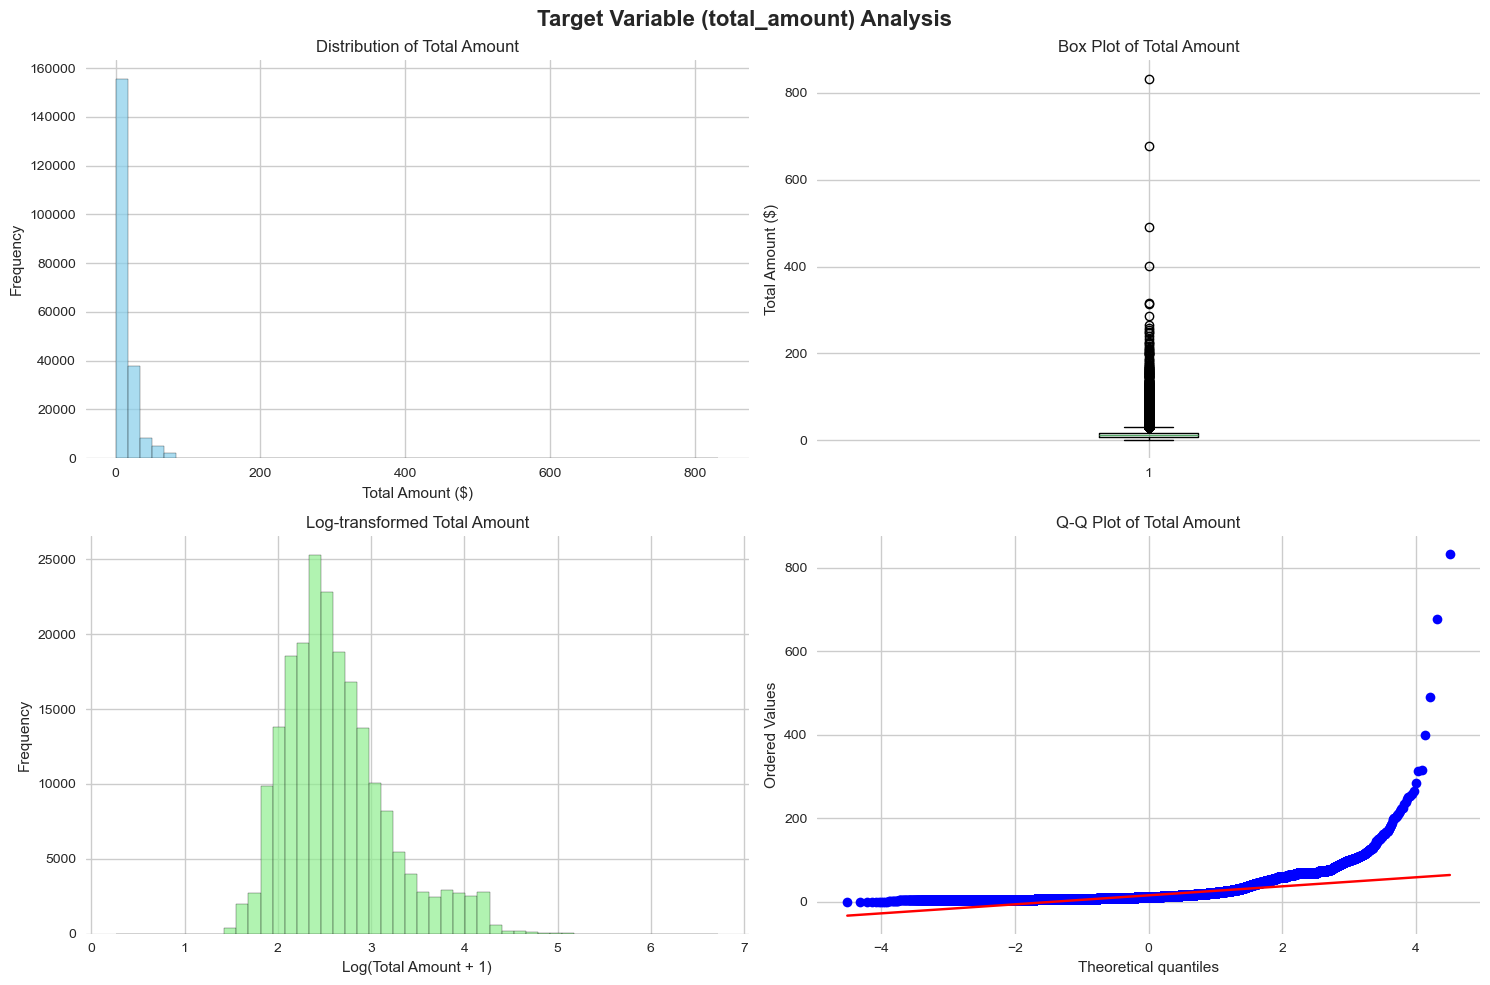

In [68]:
print("🎯 Analyzing target variable distribution...")
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Target Variable (total_amount) Analysis', fontsize=16, fontweight='bold')
 # Histogram
axes[0,0].hist(data['total_amount'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].set_title('Distribution of Total Amount')
axes[0,0].set_xlabel('Total Amount ($)')
axes[0,0].set_ylabel('Frequency')

# Box plot
axes[0,1].boxplot(data['total_amount'])
axes[0,1].set_title('Box Plot of Total Amount')
axes[0,1].set_ylabel('Total Amount ($)')
    
# Log transformation
log_total = np.log1p(data['total_amount'])
axes[1,0].hist(log_total, bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
axes[1,0].set_title('Log-transformed Total Amount')
axes[1,0].set_xlabel('Log(Total Amount + 1)')
axes[1,0].set_ylabel('Frequency')
    
# Q-Q plot
stats.probplot(data['total_amount'], dist="norm", plot=axes[1,1])
axes[1,1].set_title('Q-Q Plot of Total Amount')
    
plt.tight_layout()
plt.show()
    

In [69]:
# Both the log-transformed histogram and the Q-Q plot are used to check and improve the normality of total_amount,
# which helps meet assumptions for many statistical models and reduces skewness for better predictive performance.

### A. Univariate Analysis (Single Variable) - Histogram & Count plot

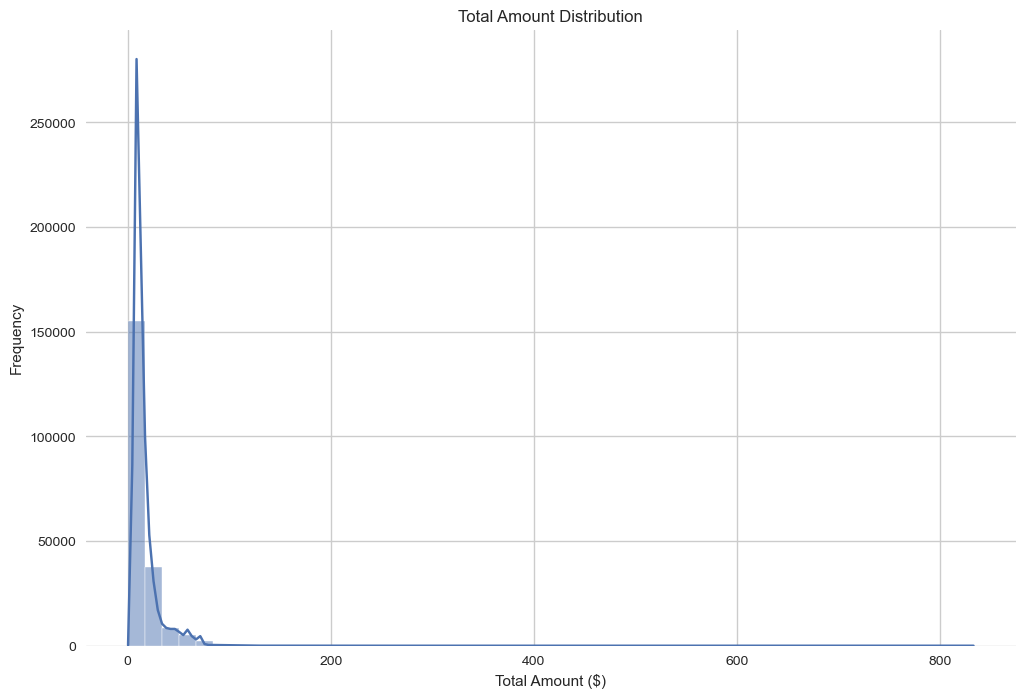

In [70]:
# Total amount distribution
sns.histplot(data['total_amount'], bins=50, kde=True)
plt.title("Total Amount Distribution")
plt.xlabel("Total Amount ($)")
plt.ylabel("Frequency")
plt.show()

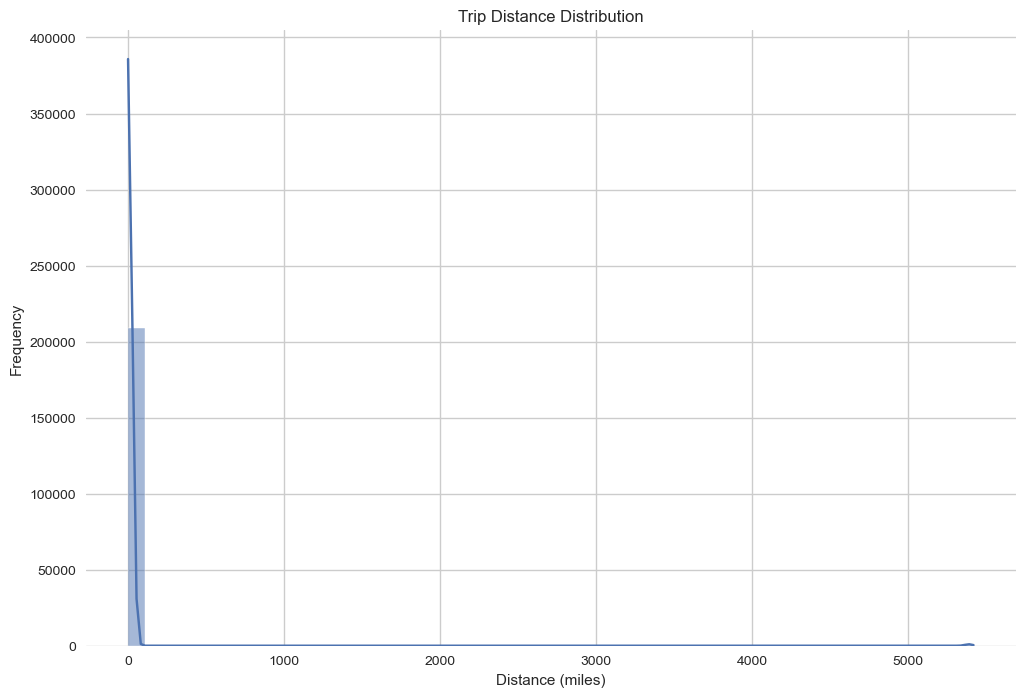

In [71]:
# Trip distance distribution
sns.histplot(data['trip_distance_calculated'], bins=50, kde=True)
plt.title("Trip Distance Distribution")
plt.xlabel("Distance (miles)")
plt.ylabel("Frequency")
plt.show()

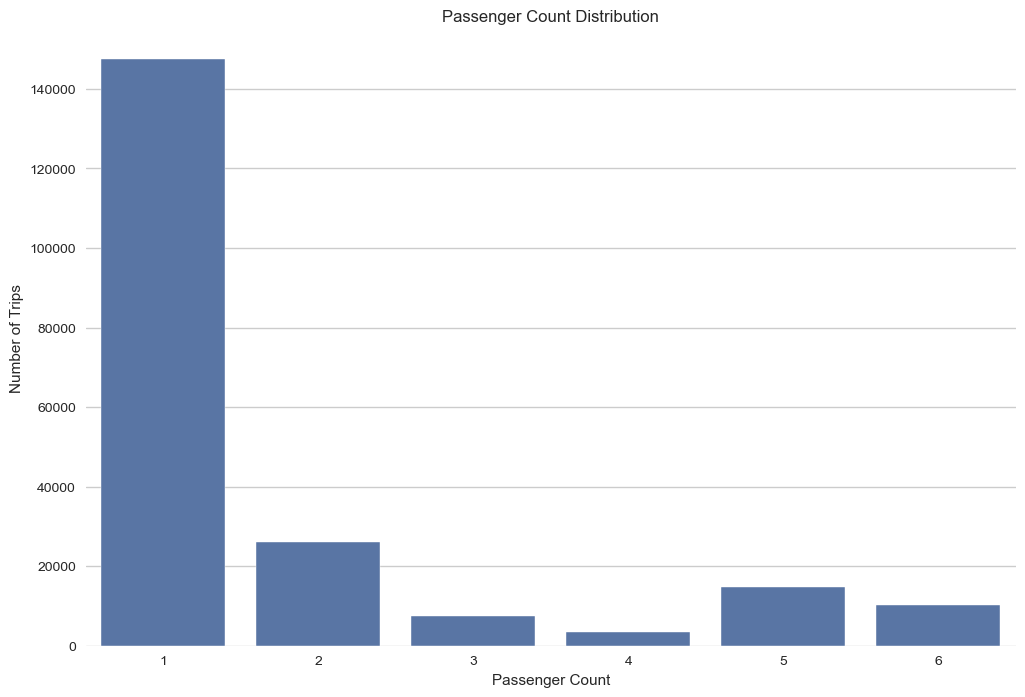

In [72]:
# Passenger count distribution
sns.countplot(x='passenger_count', data=data)
plt.title("Passenger Count Distribution")
plt.xlabel("Passenger Count")
plt.ylabel("Number of Trips")
plt.show()

### B. Bivariate Analysis (Relationships Between Variables)

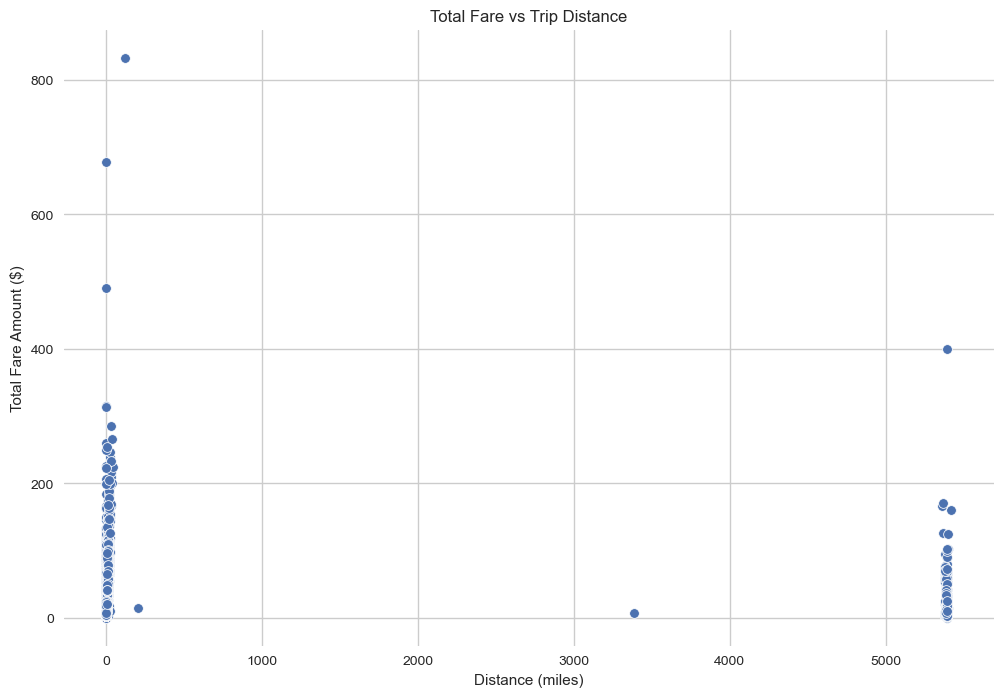

In [73]:
# Fare vs Distance
sns.scatterplot(x='trip_distance_calculated', y='total_amount', data=data)
plt.title("Total Fare vs Trip Distance")
plt.xlabel("Distance (miles)")
plt.ylabel("Total Fare Amount ($)")
plt.show()

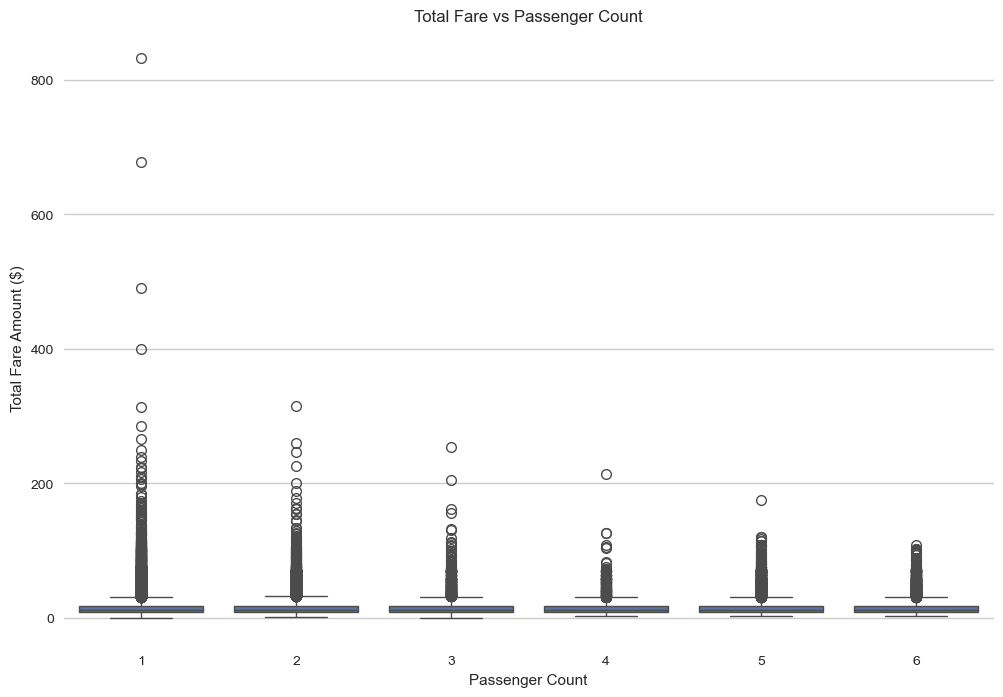

In [74]:
# Fare vs Passenger Count
sns.boxplot(x='passenger_count', y='total_amount', data=data)
plt.title("Total Fare vs Passenger Count")
plt.xlabel("Passenger Count")
plt.ylabel("Total Fare Amount ($)")
plt.show()

### C. Time-based Analysis

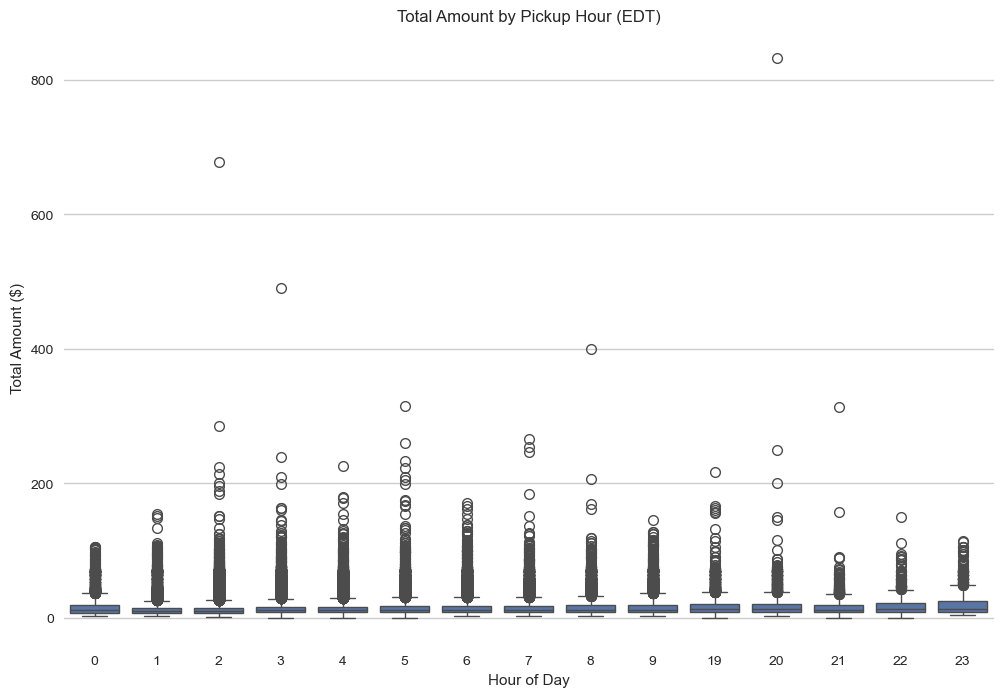

In [75]:
# Fare by hour of day
sns.boxplot(x='pickup_hour', y='total_amount', data=data)
plt.title("Total Amount by Pickup Hour (EDT)")
plt.xlabel("Hour of Day")
plt.ylabel("Total Amount ($)")
plt.show()

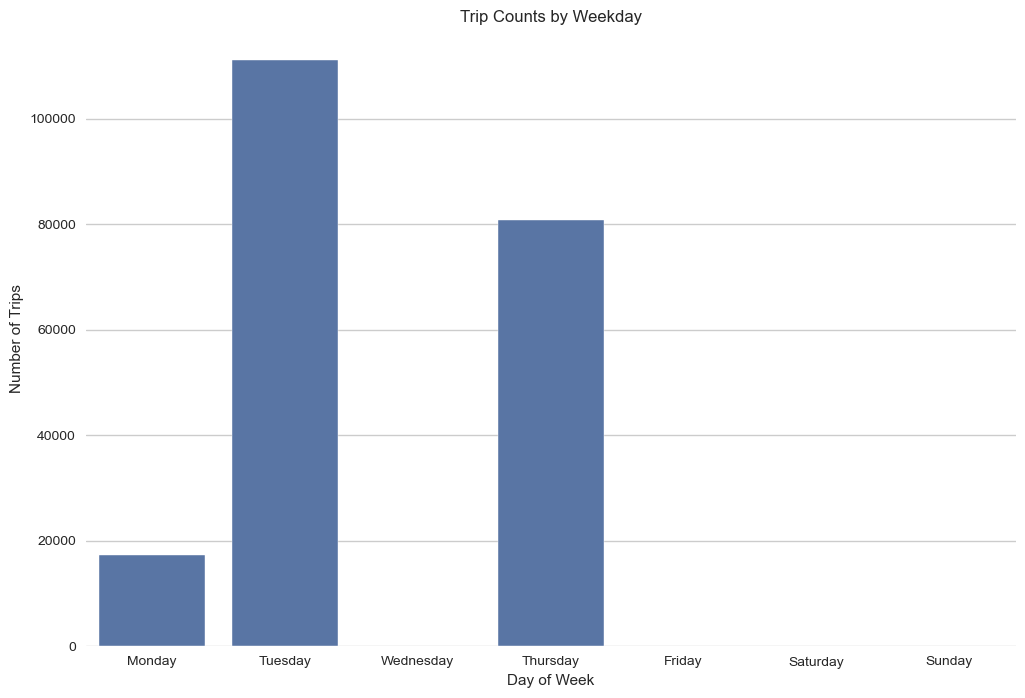

In [76]:
# Trip count by weekday
sns.countplot(x='pickup_weekday_name', data=data, order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title("Trip Counts by Weekday")
plt.xlabel("Day of Week")
plt.ylabel("Number of Trips")
plt.show()

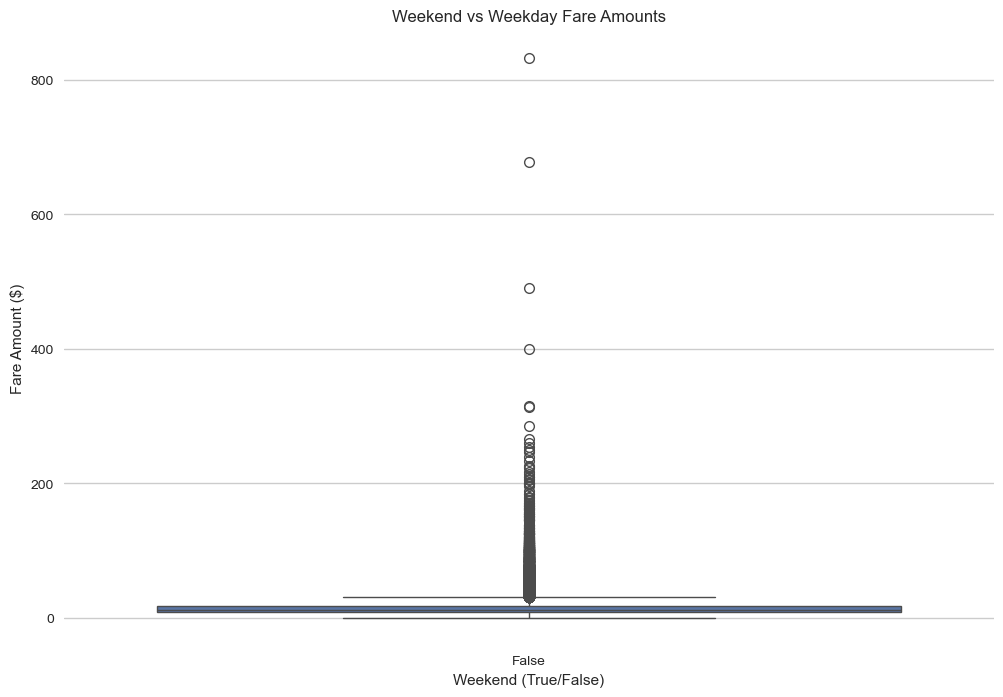

In [77]:
# Weekday vs Weekend
data['is_weekend'] = data['pickup_weekday_name'].isin([5, 6])  # 5=Sat, 6=Sun
sns.boxplot(x='is_weekend', y='total_amount', data=data)
plt.title("Weekend vs Weekday Fare Amounts")
plt.xlabel("Weekend (True/False)")
plt.ylabel("Fare Amount ($)")
plt.show()

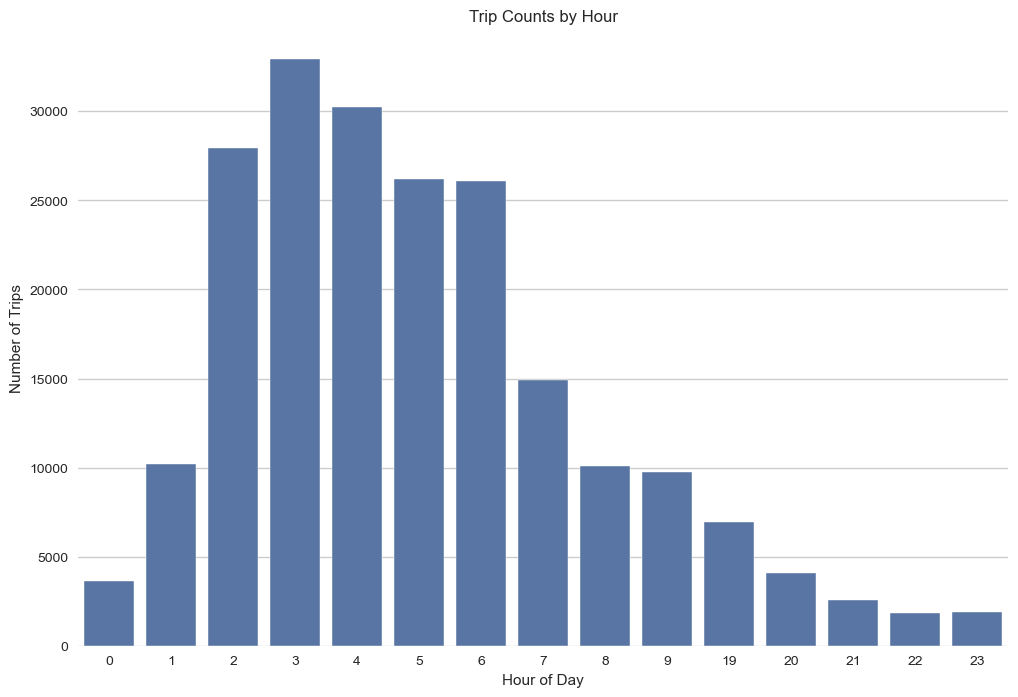

In [78]:
# Trip count by pickup hour
sns.countplot(x='pickup_hour', data=data)
plt.title("Trip Counts by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Trips")
plt.show()

### D. Fare Per Mile & Fare Per Minute
* (Needs trip duration — assuming trip_duration_minutes column exists)

In [79]:
# Create new fare metrics
data['fare_per_mile'] = data['total_amount'] / data['trip_distance_calculated']
data['fare_per_minute'] = data['total_amount'] / data['trip_duration_minutes']

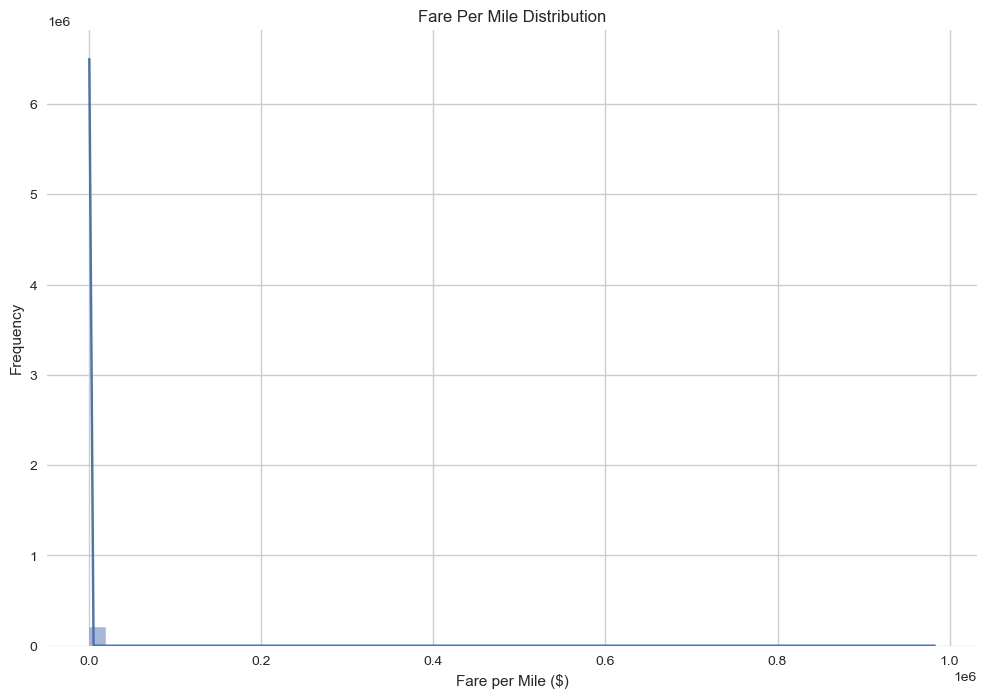

In [80]:
# Visualize
sns.histplot(data['fare_per_mile'], bins=50, kde=True)
plt.title("Fare Per Mile Distribution")
plt.xlabel("Fare per Mile ($)")
plt.ylabel("Frequency")
plt.show()

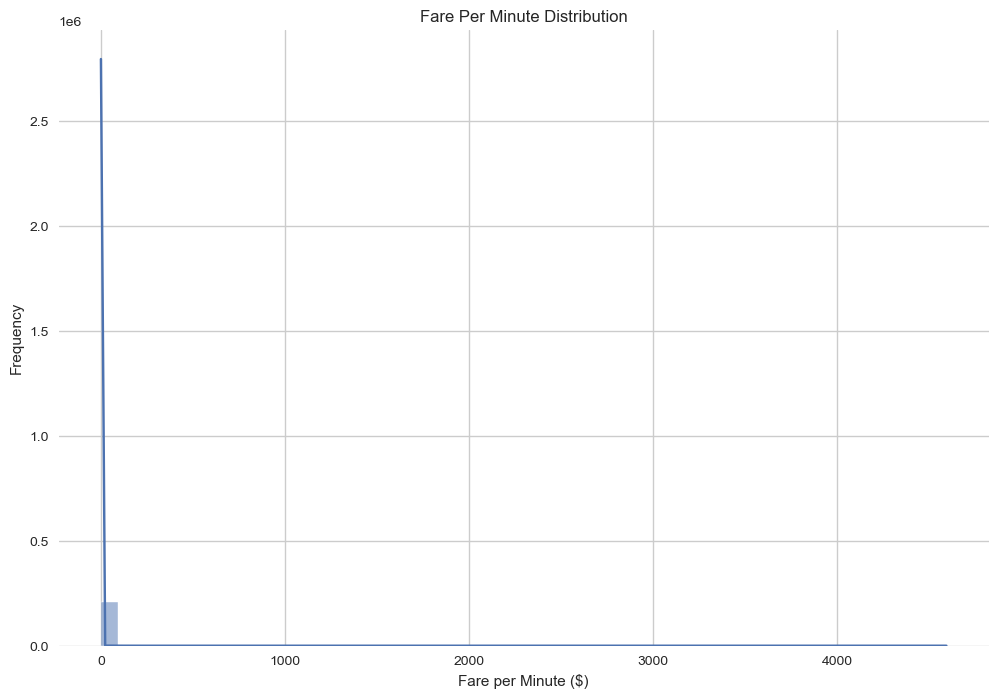

In [81]:
sns.histplot(data['fare_per_minute'], bins=50, kde=True)
plt.title("Fare Per Minute Distribution")
plt.xlabel("Fare per Minute ($)")
plt.ylabel("Frequency")
plt.show()

In [82]:
data.shape

(209223, 22)

In [83]:
data.columns

Index(['VendorID', 'passenger_count', 'RatecodeID', 'payment_type',
       'total_amount', 'trip_distance_calculated', 'trip_duration_minutes',
       'pickup_year', 'pickup_month', 'pickup_weekday_name', 'pickup_hour',
       'dropoff_year', 'dropoff_month', 'dropoff_weekday_name', 'dropoff_hour',
       'is_pm', 'is_night', 'is_morning_rush', 'is_evening_rush', 'is_weekend',
       'fare_per_mile', 'fare_per_minute'],
      dtype='object')

In [84]:
# fare_per_mile
# fare_per_minutes 
# Both the concepts are Self Exploreble ideas not the Project Scope.

In [85]:
data['is_weekend'].unique() #series dtype

array([False])

In [86]:
data.drop(['is_weekend','fare_per_minute','fare_per_mile','RatecodeID'], axis=1, inplace=True)

In [87]:
data.shape

(209223, 18)

In [89]:
data.head()

,VendorID,passenger_count,payment_type,total_amount,trip_distance_calculated,trip_duration_minutes,pickup_year,pickup_month,pickup_weekday_name,pickup_hour,dropoff_year,dropoff_month,dropoff_weekday_name,dropoff_hour,is_pm,is_night,is_morning_rush,is_evening_rush
0,1,1,1,12.35,1.952013,7.916667,2016,2,Monday,19,2016,2,Monday,19,1,0,0,1
1,1,1,1,15.35,2.676833,11.100000,2016,2,Monday,19,2016,2,Monday,19,1,0,0,1
2,2,2,1,63.80,10.325908,31.100000,2016,2,Monday,19,2016,2,Monday,19,1,0,0,1
3,2,3,1,41.62,5.627290,0.000000,2016,2,Monday,19,2016,2,Monday,19,1,0,0,1
4,2,5,1,113.80,12.689576,0.000000,2016,2,Monday,19,2016,2,Monday,19,1,0,0,1


# Data Transformation

## Handling Duplicates

In [90]:
data.duplicated().sum()

np.int64(0)

## Encode categorical variables 

In [91]:
for i in data.select_dtypes(include="object").columns:
    print(i,data[i].unique())

pickup_weekday_name ['Monday' 'Thursday' 'Tuesday']
dropoff_weekday_name ['Monday' 'Thursday' 'Friday' 'Tuesday' 'Wednesday']


In [93]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()

In [94]:
for i in data.select_dtypes(include="object").columns:
  data[i] = encode.fit_transform(data[i])
  print(i, data[i].unique())

pickup_weekday_name [0 1 2]
dropoff_weekday_name [1 2 0 3 4]


In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 209223 entries, 0 to 212344
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   VendorID                  209223 non-null  int64  
 1   passenger_count           209223 non-null  int64  
 2   payment_type              209223 non-null  int64  
 3   total_amount              209223 non-null  float64
 4   trip_distance_calculated  209223 non-null  float64
 5   trip_duration_minutes     209223 non-null  float64
 6   pickup_year               209223 non-null  int32  
 7   pickup_month              209223 non-null  int32  
 8   pickup_weekday_name       209223 non-null  int64  
 9   pickup_hour               209223 non-null  int32  
 10  dropoff_year              209223 non-null  int32  
 11  dropoff_month             209223 non-null  int32  
 12  dropoff_weekday_name      209223 non-null  int64  
 13  dropoff_hour              209223 non-null  int32 

## Outliers

In [96]:
numerical_columns = data.select_dtypes(include=['float64', 'int64','int32']).columns
numerical_columns

Index(['VendorID', 'passenger_count', 'payment_type', 'total_amount',
       'trip_distance_calculated', 'trip_duration_minutes', 'pickup_year',
       'pickup_month', 'pickup_weekday_name', 'pickup_hour', 'dropoff_year',
       'dropoff_month', 'dropoff_weekday_name', 'dropoff_hour', 'is_pm',
       'is_night', 'is_morning_rush', 'is_evening_rush'],
      dtype='object')

In [98]:
def remove_outliers(data):
    for col in numerical_columns:
        # Calculate the first quartile (Q1) and third quartile (Q3)
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        
        # Calculate the interquartile range (IQR)
        iqr = q3 - q1
        
        # Determine the lower and upper boundaries (fences) for outliers
        fence_low = q1 - 1.5 * iqr
        fence_high = q3 + 1.5 * iqr
        
        # Keep only rows within the valid range
        data = data[(data[col] >= fence_low) & (data[col] <= fence_high)]
    
    # Currently returns the original data without removing outliers
    return data

In [99]:
data_clean = remove_outliers(data)

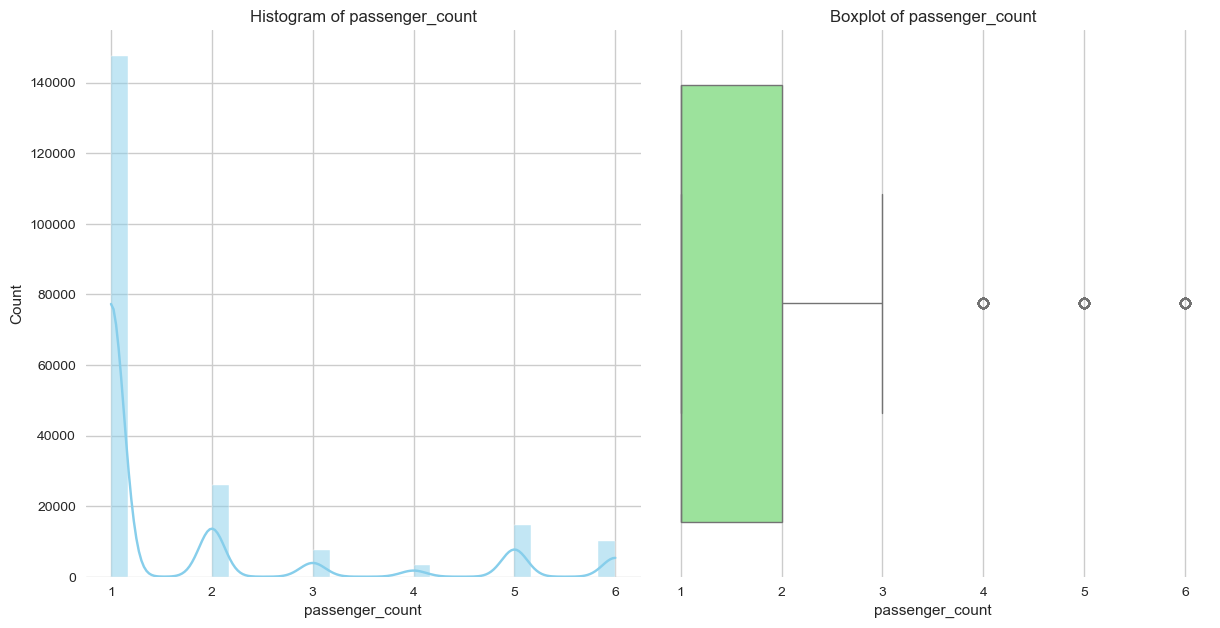

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a large figure for multiple plots
plt.figure(figsize=(18, 12))

# Subplot 1: Histogram with KDE for 'fare_amount'
plt.subplot(2, 3, 1)
sns.histplot(data['passenger_count'], kde=True, bins=30, color='skyblue')
plt.title('Histogram of passenger_count')

# Subplot 2: Boxplot for 'fare_amount'
plt.subplot(2, 3, 2)
sns.boxplot(x=data['passenger_count'], color='lightgreen')
plt.title('Boxplot of passenger_count')

# Adjust layout to prevent overlap between plots
plt.tight_layout()
# Display plots
plt.show()

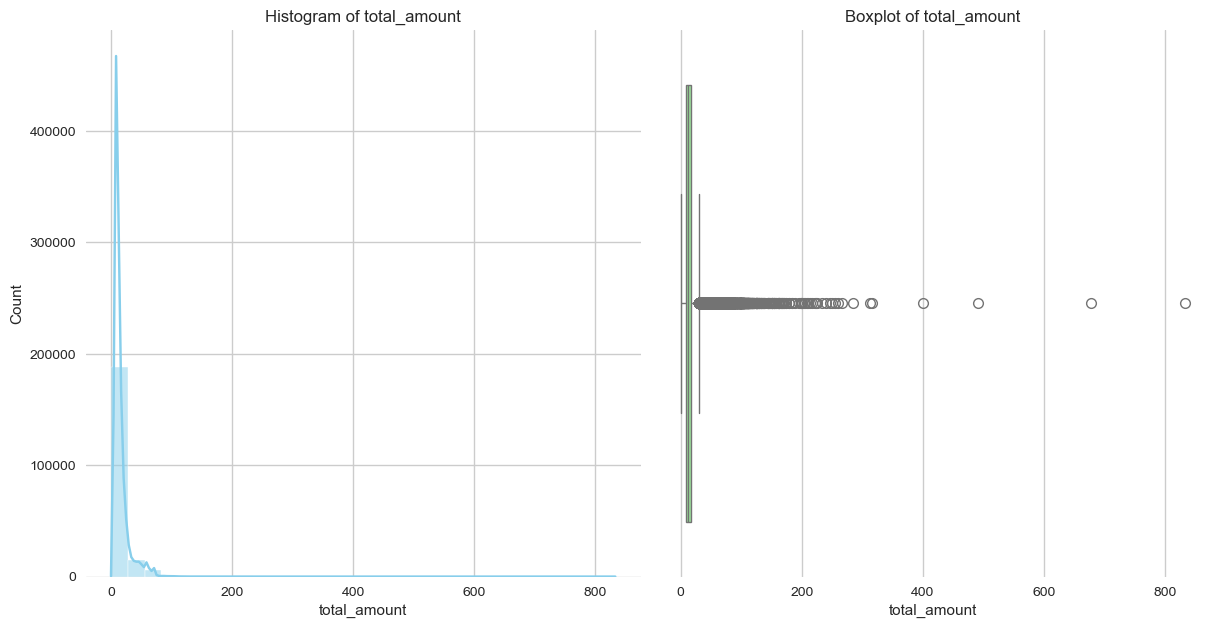

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a large figure for multiple plots
plt.figure(figsize=(18, 12))

# Subplot 1: Histogram with KDE for 'fare_amount'
plt.subplot(2, 3, 1)
sns.histplot(data['total_amount'], kde=True, bins=30, color='skyblue')
plt.title('Histogram of total_amount')

# Subplot 2: Boxplot for 'fare_amount'
plt.subplot(2, 3, 2)
sns.boxplot(x=data['total_amount'], color='lightgreen')
plt.title('Boxplot of total_amount')

# Adjust layout to prevent overlap between plots
plt.tight_layout()
# Display plots
plt.show()

In [104]:
data_clean.describe()

,VendorID,passenger_count,payment_type,total_amount,trip_distance_calculated,trip_duration_minutes,pickup_year,pickup_month,pickup_weekday_name,pickup_hour,dropoff_year,dropoff_month,dropoff_weekday_name,dropoff_hour,is_pm,is_night,is_morning_rush,is_evening_rush
count,112883.000000,112883.000000,112883.000000,112883.000000,112883.000000,112883.000000,112883.0,112883.0,112883.000000,112883.000000,112883.0,112883.0,112883.000000,112883.000000,112883.0,112883.0,112883.0,112883.0
mean,1.633488,1.213300,1.314184,11.099800,1.223294,10.741220,2016.0,3.0,1.703959,3.553910,2016.0,3.0,2.703959,3.718434,0.0,1.0,0.0,0.0
std,0.481854,0.495816,0.467671,4.386923,0.736475,5.959652,0.0,0.0,0.456511,1.561961,0.0,0.0,0.456511,1.565654,0.0,0.0,0.0,0.0
min,1.000000,1.000000,1.000000,0.300000,0.000264,0.000000,2016.0,3.0,1.000000,0.000000,2016.0,3.0,2.000000,0.000000,0.0,1.0,0.0,0.0
25%,1.000000,1.000000,1.000000,7.800000,0.670107,6.083333,2016.0,3.0,1.000000,2.000000,2016.0,3.0,2.000000,3.000000,0.0,1.0,0.0,0.0
50%,2.000000,1.000000,1.000000,10.300000,1.033925,9.650000,2016.0,3.0,2.000000,4.000000,2016.0,3.0,3.000000,4.000000,0.0,1.0,0.0,0.0
75%,2.000000,1.000000,2.000000,13.570000,1.606404,14.450000,2016.0,3.0,2.000000,5.000000,2016.0,3.0,3.000000,5.000000,0.0,1.0,0.0,0.0
max,2.000000,3.000000,3.000000,30.410000,3.608212,28.466667,2016.0,3.0,2.000000,6.000000,2016.0,3.0,3.000000,6.000000,0.0,1.0,0.0,0.0


In [111]:
data.shape

(209223, 18)

In [110]:
data.columns

Index(['VendorID', 'passenger_count', 'payment_type', 'total_amount',
       'trip_distance_calculated', 'trip_duration_minutes', 'pickup_year',
       'pickup_month', 'pickup_weekday_name', 'pickup_hour', 'dropoff_year',
       'dropoff_month', 'dropoff_weekday_name', 'dropoff_hour', 'is_pm',
       'is_night', 'is_morning_rush', 'is_evening_rush'],
      dtype='object')

## Skewness

# Numeric features to check for skewness

* passenger_count
* total_amount (target variable, but you can still check its skewness for transformation purposes)
* trip_distance_calculated
* trip_duration_minutes

# Why not the others?

* VendorID, payment_type → Categorical identifiers, not continuous.

* pickup_year, pickup_month, pickup_weekday_name, pickup_hour, dropoff_year, dropoff_month, dropoff_weekday_name, dropoff_hour → Mostly categorical/time-based (though hours are numeric, they are cyclical, so skewness check is less meaningful).

* is_pm, is_night, is_morning_rush, is_evening_rush → Binary indicators (0/1), skewness measure isn’t very useful here.

In [107]:
columns = columns = ['passenger_count', 'total_amount','trip_distance_calculated','trip_duration_minutes']
skewness = data[columns].skew()
skewness

passenger_count              1.882729
total_amount                 5.165976
trip_distance_calculated    19.929818
trip_duration_minutes       11.718762
dtype: float64

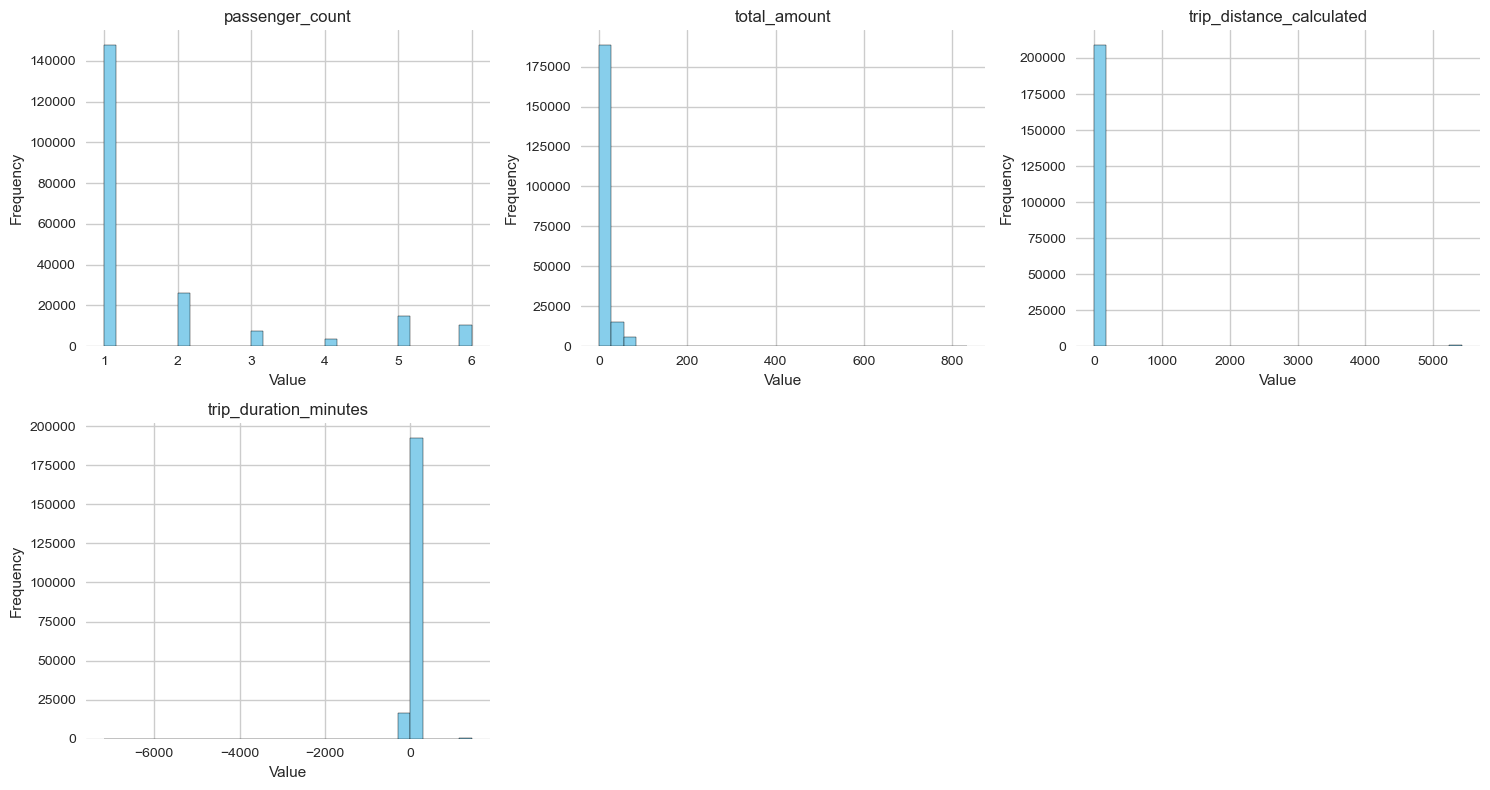

In [108]:
import matplotlib.pyplot as plt
import numpy as np

# Select numerical columns with high skewness (absolute skewness > 0.5)
skewed_cols = skewness[abs(skewness) > 0.5].index

# Determine grid size dynamically (3 columns per row)
n_cols = 3
n_rows = int(np.ceil(len(skewed_cols) / n_cols))

# Plot histograms before transformation
plt.figure(figsize=(n_cols * 5, n_rows * 4))  # scale figure size
for i, col in enumerate(skewed_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    plt.hist(data[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(col)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


## Apply Log Transform to Positively Skewed Columns

In [109]:
import numpy as np
# Apply log transformation to positively skewed columns
data[columns] = data[columns].apply(lambda x: np.log1p(x))

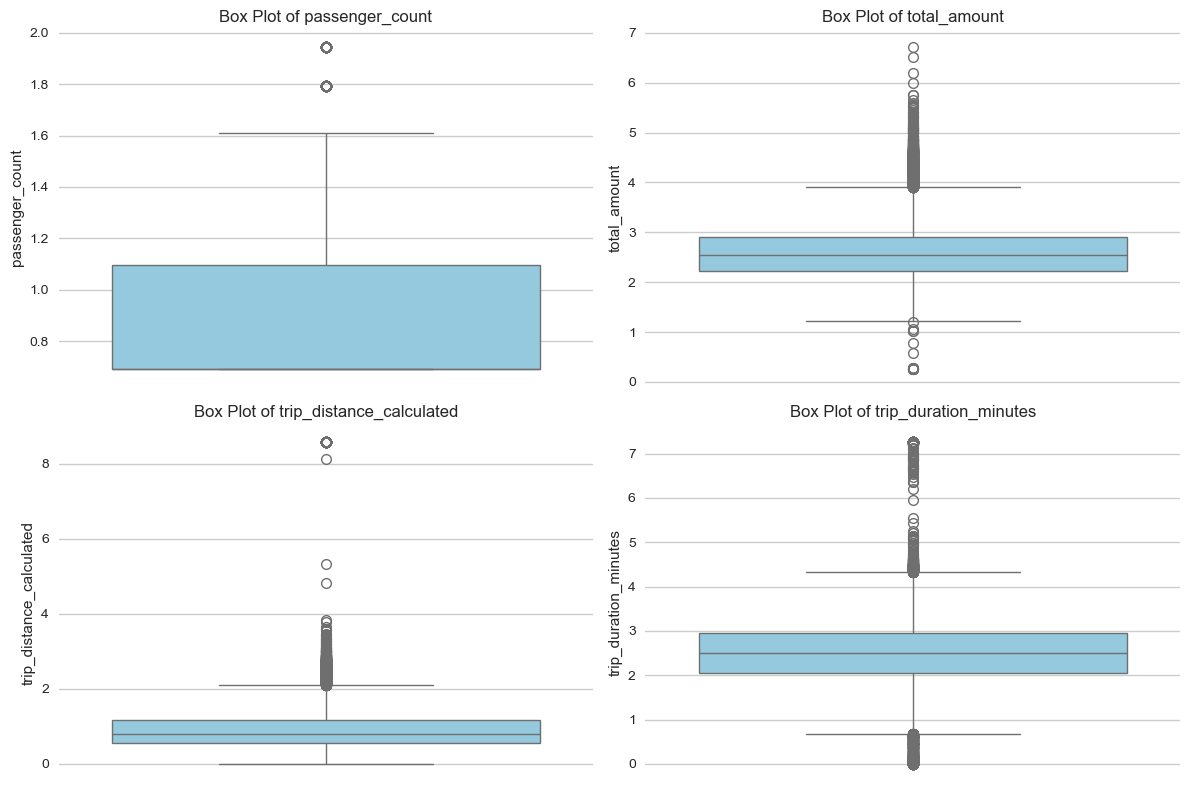

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of columns to visualize
columns = [
    'passenger_count',
    'total_amount',
    'trip_distance_calculated',
    'trip_duration_minutes'
]

plt.figure(figsize=(12, 8))

# Create a subplot for each column
for i, col in enumerate(columns, 1):
    plt.subplot(2, 2, i)  # 2 rows, 2 columns of plots
    sns.boxplot(y=data[col], color='skyblue')
    plt.title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()


## Feature Selection

In [113]:
numerical = data.select_dtypes(include=['float64','int64','int32']).columns

<Axes: >

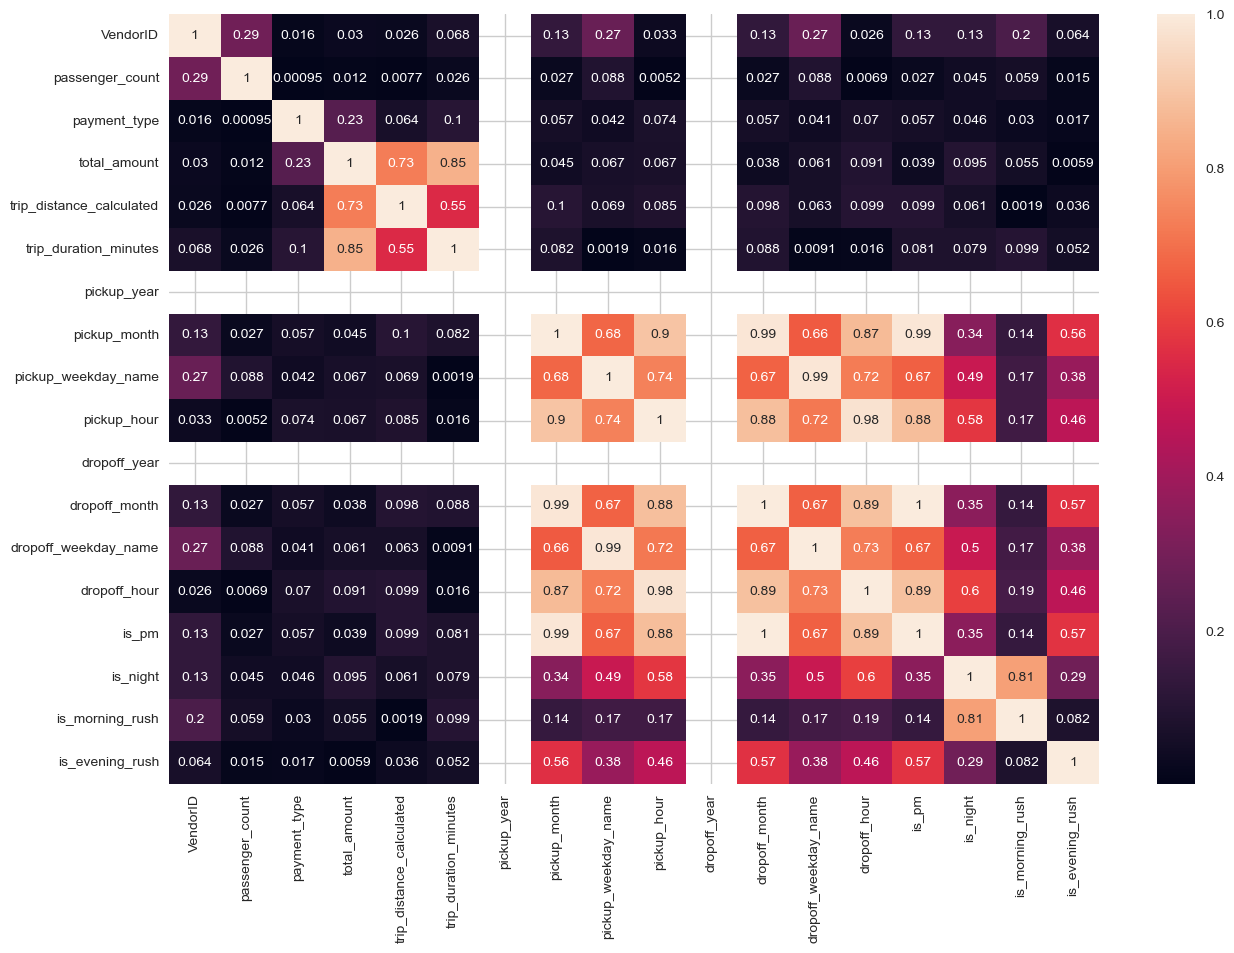

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,10))
sns.heatmap(data[numerical].corr().abs(),annot=True)

In [ ]:
data.corr()

In [116]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# Define features and target
X = data.drop(columns=['total_amount'])
y = data['total_amount']

# Train a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Create a DataFrame for feature importances
feature_importance_data = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
})

# Sort by importance in descending order
feature_importance_data = feature_importance_data.sort_values(by='Importance', ascending=False)

# Display the top features
print(feature_importance_data)


                     Feature  Importance
4      trip_duration_minutes    0.715565
3   trip_distance_calculated    0.247656
2               payment_type    0.020715
8                pickup_hour    0.004157
12              dropoff_hour    0.004153
1            passenger_count    0.002433
0                   VendorID    0.001349
7        pickup_weekday_name    0.001027
11      dropoff_weekday_name    0.000837
15           is_morning_rush    0.000589
6               pickup_month    0.000401
14                  is_night    0.000370
16           is_evening_rush    0.000285
13                     is_pm    0.000249
10             dropoff_month    0.000214
5                pickup_year    0.000000
9               dropoff_year    0.000000
